# Objectives

In [1]:
# Clean dataset
# Analyse dataset
# Visualize dataset

# Questions to solve

In [2]:
# How long does it take for the orders to be shipped after they are placed
# Who was the most frequent customer
# What city has the most customers
# What product was sold the most
# What category was the most sold
# What is the most popular sub-category
# What is the highly prioritised product
# How long do the products last
# What month has the highest orders
# Which product made the most profit
# What month made the highest sales
# How does the ship mode affect the sales
# Which customer buys more products
# Product with the highest shipping cost

# Data cleaning and analysis

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Viewing the document 
df = pd.read_excel("Global Superstore.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
df = df.drop('Postal Code', axis=1)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [9]:
sales = []
for i in df['Sales'].unique():
    sales.append(i)
sales

[2309.65,
 3709.3949999999995,
 5175.171000000001,
 2892.5099999999998,
 2832.96,
 2862.675,
 1822.0799999999997,
 5244.84,
 5083.96,
 4297.644,
 4164.049999999999,
 4626.15,
 2616.96,
 2221.8,
 3701.5199999999995,
 1869.5879999999997,
 2249.91,
 7958.58,
 2565.594,
 3409.74,
 1977.7199999999998,
 2735.952,
 2753.999999999999,
 5273.7,
 1713.8400000000001,
 2106.496,
 1715.1599999999999,
 3069.7380000000003,
 4158.912,
 1878.7199999999998,
 1696.64,
 2402.8650000000002,
 2453.43,
 2526.93,
 3610.848,
 3817.26,
 2799.96,
 7999.98,
 4141.02,
 2875.0950000000007,
 3200.5962,
 4518.78,
 5667.87,
 5785.0199999999995,
 3018.624,
 9449.95,
 2092.4999999999995,
 2761.2,
 2174.13,
 3473.1399999999994,
 3050.376,
 2108.64,
 2399.96,
 2197.5,
 2582.16,
 1526.52,
 3149.9300000000003,
 1745.34,
 4191.507,
 4367.896000000001,
 3063.27,
 4643.8,
 4473.000000000001,
 1502.0100000000002,
 5048.999999999999,
 2104.5499999999997,
 2188.05,
 1920.3600000000001,
 1704.0000000000005,
 1858.6800000000003,
 3

In [10]:
sales1 = df['Sales'][-30:-1]
print(sales1)

51260     20.416
51261     53.730
51262      6.690
51263     36.480
51264     17.880
51265    200.400
51266     47.142
51267     49.302
51268     30.440
51269     12.960
51270      1.344
51271      5.340
51272     19.320
51273     41.640
51274      5.920
51275     52.590
51276      1.624
51277     17.940
51278      5.364
51279      9.612
51280     34.128
51281     84.000
51282     18.640
51283     26.940
51284     58.050
51285     65.100
51286      0.444
51287     22.920
51288     13.440
Name: Sales, dtype: float64


In [11]:
df['Selling price for one'] = df.apply(lambda _: None, axis = 1)
df['Selling price for one'] = df['Sales'].astype(int) / df['Quantity']
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Selling price for one
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical,329.857143
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,412.111111
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium,575.000000
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium,578.400000
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical,354.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium,13.000000
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium,0.000000
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High,7.333333
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium,6.500000


In [12]:
df['Cost price'] = df.apply(lambda _: None, axis = 1)
df['Cost price'] = df['Sales'] - df['Profit']
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Selling price for one,Cost price
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical,329.857143,1547.4655
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,412.111111,3998.1600
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium,575.000000,4255.2000
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium,578.400000,2989.0500
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical,354.000000,2521.4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium,13.000000,60.6000
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium,0.000000,1.5540
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High,7.333333,11.6892
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium,6.500000,11.0400


In [13]:
df['Day of order'] = df.apply(lambda _: None, axis = 1)
df['Day of shipping'] = df.apply(lambda _: None, axis = 1)
df['Day of order'] = df['Order Date'].apply(lambda x: x.strftime('%d'))
df['Day of shipping'] = df['Ship Date'].apply(lambda x: x.strftime('%d'))
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Selling price for one,Cost price,Day of order,Day of shipping
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.650,7,0.0,762.1845,933.570,Critical,329.857143,1547.4655,31,31
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.7650,923.630,Critical,412.111111,3998.1600,05,07
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,5175.171,9,0.1,919.9710,915.490,Medium,575.000000,4255.2000,17,18
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,2892.510,5,0.1,-96.5400,910.160,Medium,578.400000,2989.0500,28,30
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,2832.960,8,0.0,311.5200,903.040,Critical,354.000000,2521.4400,05,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,65.100,5,0.0,4.5000,0.010,Medium,13.000000,60.6000,19,19
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,0.444,1,0.8,-1.1100,0.010,Medium,0.000000,1.5540,20,24
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,22.920,3,0.0,11.2308,0.010,High,7.333333,11.6892,02,02
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,13.440,2,0.0,2.4000,0.003,Medium,6.500000,11.0400,18,22


In [14]:
df['Order Month'] = df.apply(lambda _: None, axis = 1)
df['Order Year'] = df.apply(lambda _: None, axis = 1)
months = calendar.month_name[1:]
df['Order Month'] = df['Order Date'].apply(lambda x: x.strftime('%B'))
df['Order Year'] = df['Order Date'].apply(lambda x: x.strftime('%Y'))
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Selling price for one,Cost price,Day of order,Day of shipping,Order Month,Order Year
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,0.0,762.1845,933.570,Critical,329.857143,1547.4655,31,31,July,2012
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,923.630,Critical,412.111111,3998.1600,05,07,February,2013
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,915.490,Medium,575.000000,4255.2000,17,18,October,2013
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,910.160,Medium,578.400000,2989.0500,28,30,January,2013
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,0.0,311.5200,903.040,Critical,354.000000,2521.4400,05,06,November,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,0.0,4.5000,0.010,Medium,13.000000,60.6000,19,19,June,2014
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,0.8,-1.1100,0.010,Medium,0.000000,1.5540,20,24,June,2014
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,0.0,11.2308,0.010,High,7.333333,11.6892,02,02,December,2013
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,0.0,2.4000,0.003,Medium,6.500000,11.0400,18,22,February,2012


In [15]:
df['Ship Month'] = df.apply(lambda _: None, axis = 1)
df['Ship Year'] = df.apply(lambda _: None, axis = 1)
df['Ship Month'] = df['Ship Date'].apply(lambda x: x.strftime('%B'))
df['Ship Year'] = df['Ship Date'].apply(lambda x: x.strftime('%Y'))
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Shipping Cost,Order Priority,Selling price for one,Cost price,Day of order,Day of shipping,Order Month,Order Year,Ship Month,Ship Year
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,933.570,Critical,329.857143,1547.4655,31,31,July,2012,July,2012
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,923.630,Critical,412.111111,3998.1600,05,07,February,2013,February,2013
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,915.490,Medium,575.000000,4255.2000,17,18,October,2013,October,2013
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,910.160,Medium,578.400000,2989.0500,28,30,January,2013,January,2013
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,903.040,Critical,354.000000,2521.4400,05,06,November,2013,November,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,0.010,Medium,13.000000,60.6000,19,19,June,2014,June,2014
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,0.010,Medium,0.000000,1.5540,20,24,June,2014,June,2014
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,0.010,High,7.333333,11.6892,02,02,December,2013,December,2013
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,0.003,Medium,6.500000,11.0400,18,22,February,2012,February,2012


In [16]:
df['Days taken'] = df.apply(lambda _: None, axis = 1)
df['Days taken'] = df['Day of shipping'].astype(int) - df['Day of order'].astype(int)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Order Priority,Selling price for one,Cost price,Day of order,Day of shipping,Order Month,Order Year,Ship Month,Ship Year,Days taken
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Critical,329.857143,1547.4655,31,31,July,2012,July,2012,0
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Critical,412.111111,3998.1600,05,07,February,2013,February,2013,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Medium,575.000000,4255.2000,17,18,October,2013,October,2013,1
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Medium,578.400000,2989.0500,28,30,January,2013,January,2013,2
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Critical,354.000000,2521.4400,05,06,November,2013,November,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Medium,13.000000,60.6000,19,19,June,2014,June,2014,0
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Medium,0.000000,1.5540,20,24,June,2014,June,2014,4
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,High,7.333333,11.6892,02,02,December,2013,December,2013,0
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Medium,6.500000,11.0400,18,22,February,2012,February,2012,4


In [17]:
df['Days taken'] = df['Days taken'].abs()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Order Priority,Selling price for one,Cost price,Day of order,Day of shipping,Order Month,Order Year,Ship Month,Ship Year,Days taken
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Critical,329.857143,1547.4655,31,31,July,2012,July,2012,0
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Critical,412.111111,3998.1600,05,07,February,2013,February,2013,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Medium,575.000000,4255.2000,17,18,October,2013,October,2013,1
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Medium,578.400000,2989.0500,28,30,January,2013,January,2013,2
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Critical,354.000000,2521.4400,05,06,November,2013,November,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Medium,13.000000,60.6000,19,19,June,2014,June,2014,0
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Medium,0.000000,1.5540,20,24,June,2014,June,2014,4
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,High,7.333333,11.6892,02,02,December,2013,December,2013,0
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Medium,6.500000,11.0400,18,22,February,2012,February,2012,4


In [18]:
df['Days taken'].unique()

array([ 0,  2,  1, 27,  4,  7,  3, 28,  6, 30, 26,  5, 24, 25, 29, 23, 22,
       21])

# Data Visualisation

In [19]:
# Order with the longest shipping time
df2 = df.groupby(['Order ID']) ['Days taken'].max().to_frame().sort_values(by = 'Days taken', ascending = False)
df2

,Days taken
Order ID,
MX-2012-153829,30
MX-2012-148271,30
US-2014-133193,30
IN-2014-29774,30
MX-2014-114587,30
...,...
US-2013-167367,0
ES-2013-5338073,0
MO-2013-8690,0


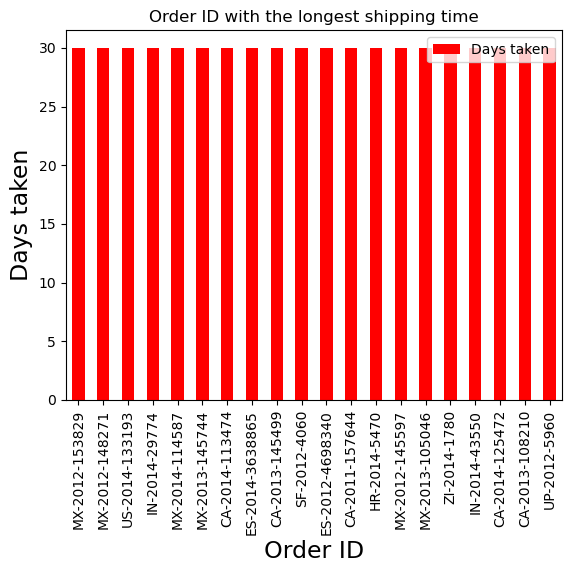

In [20]:
df2.head(20).plot(kind = 'bar', color = 'red')
plt.xlabel('Order ID', size = 17)
plt.ylabel('Days taken', size = 17)
plt.title("Order ID with the longest shipping time")
plt.show()

In [21]:
# Most frequent customer
df3 = df.groupby(['Customer Name']) ['Order ID'].count().to_frame().sort_values(by = 'Order ID', ascending = False)
top_10 = df3.nlargest(10, 'Order ID')
top_10

,Order ID
Customer Name,
Muhammed Yedwab,108
Steven Ward,106
Gary Hwang,102
Patrick O'Brill,102
Bill Eplett,102
Harry Greene,101
Eric Murdock,100
Art Ferguson,98
Brosina Hoffman,97


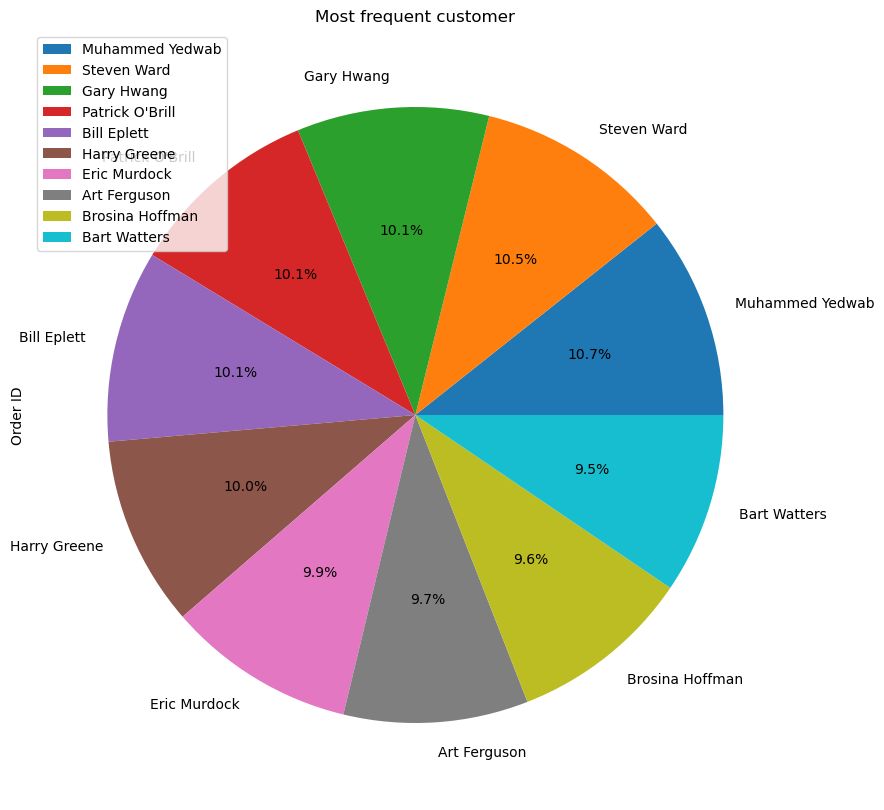

In [22]:
top_10.plot.pie(subplots=True, figsize=(14, 10), autopct='%1.1f%%')
plt.title("Most frequent customer")
plt.show()

In [23]:
# City with the most customers
df4 = df.groupby(['City']) ['Customer ID'].count().to_frame().sort_values(by = 'Customer ID', ascending = False)
top_10_customers = df4.nlargest(10, 'Customer ID')
top_10_customers

,Customer ID
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Santo Domingo,443
Manila,432
Seattle,428
Houston,377
Tegucigalpa,362


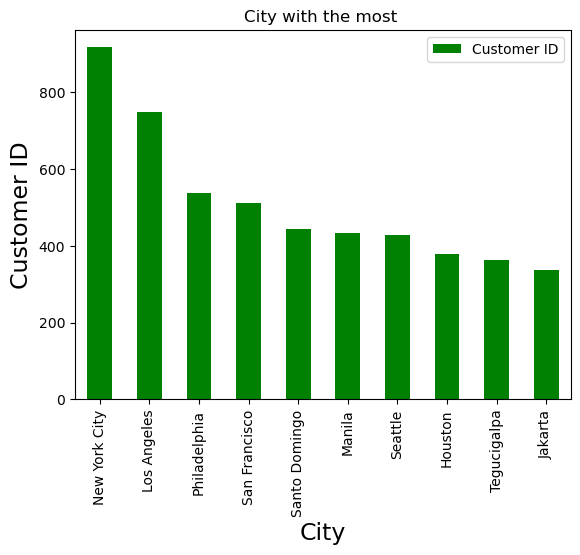

In [24]:
top_10_customers.plot(kind = 'bar', color = 'green')
plt.xlabel('City', size = 17)
plt.ylabel('Customer ID', size = 17)
plt.title("City with the most ")
plt.show()

In [25]:
# Most sold product
df4 = df.groupby(['Product ID']) ['Quantity'].sum().to_frame().sort_values(by = 'Quantity', ascending = False)
top_10_product = df4.nlargest(10, 'Quantity')
top_10_product

,Quantity
Product ID,
OFF-AR-10003651,163
OFF-BI-10002799,130
OFF-AR-10003829,117
OFF-BI-10001808,112
OFF-BI-10003708,111
FUR-CH-10003354,106
OFF-BI-10002570,102
OFF-AR-10000110,97
OFF-BI-10004195,92


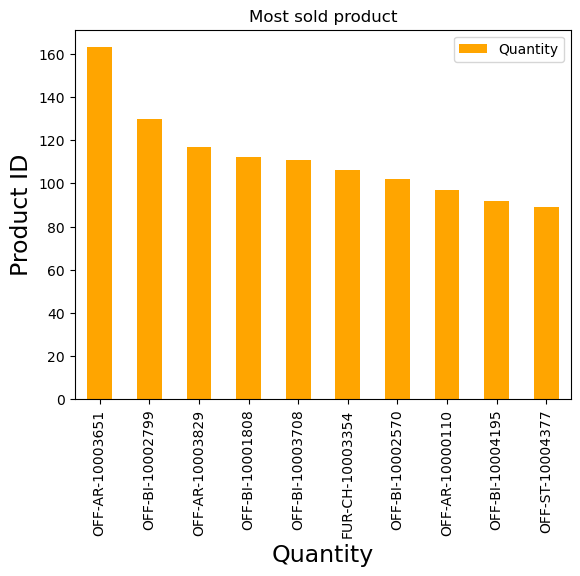

In [26]:
top_10_product.plot(kind = 'bar', color = 'orange')
plt.xlabel('Quantity', size = 17)
plt.ylabel('Product ID', size = 17)
plt.title("Most sold product")
plt.show()

In [27]:
# What category was sold the most
df4 = df.groupby(['Category']) ['Quantity'].sum().to_frame().sort_values(by = 'Quantity', ascending = False)
top_10_category = df4.nlargest(10, 'Quantity')
top_10_category

,Quantity
Category,
Office Supplies,108182
Technology,35176
Furniture,34954


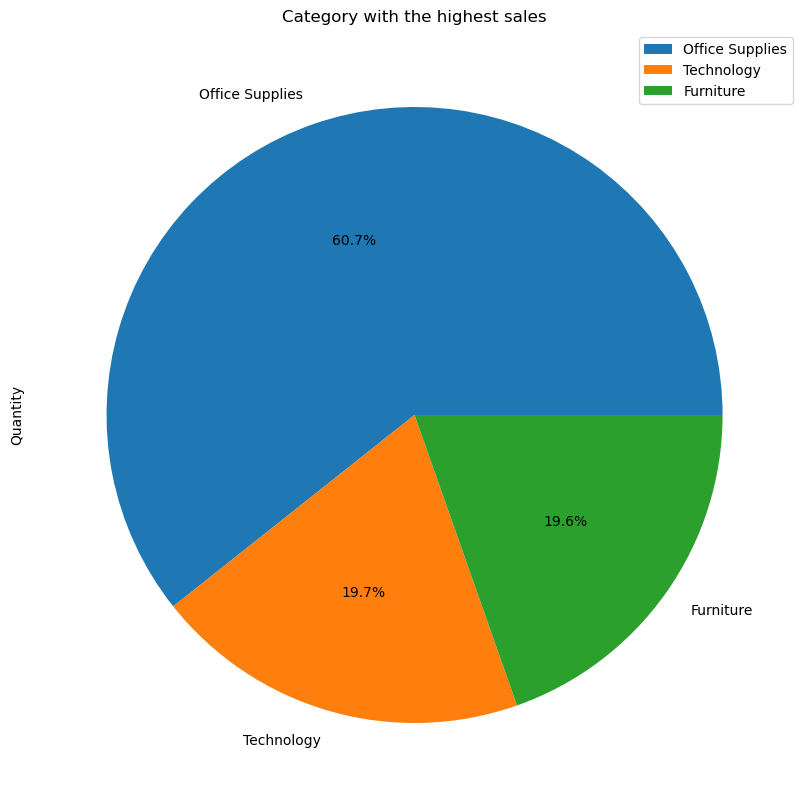

In [28]:
top_10_category.plot.pie(subplots=True, figsize=(14, 10), autopct='%1.1f%%')
plt.title("Category with the highest sales")
plt.show()

In [29]:
# Most popular sub-category
df5 = df.groupby(['Sub-Category']) ['Quantity'].sum().to_frame().sort_values(by = 'Quantity', ascending = False)
top_10_sub_category = df5.nlargest(10, 'Quantity')
top_10_sub_category

,Quantity
Sub-Category,
Binders,21429
Storage,16917
Art,16301
Paper,12822
Chairs,12336
Phones,11870
Furnishings,11225
Accessories,10946
Labels,9322


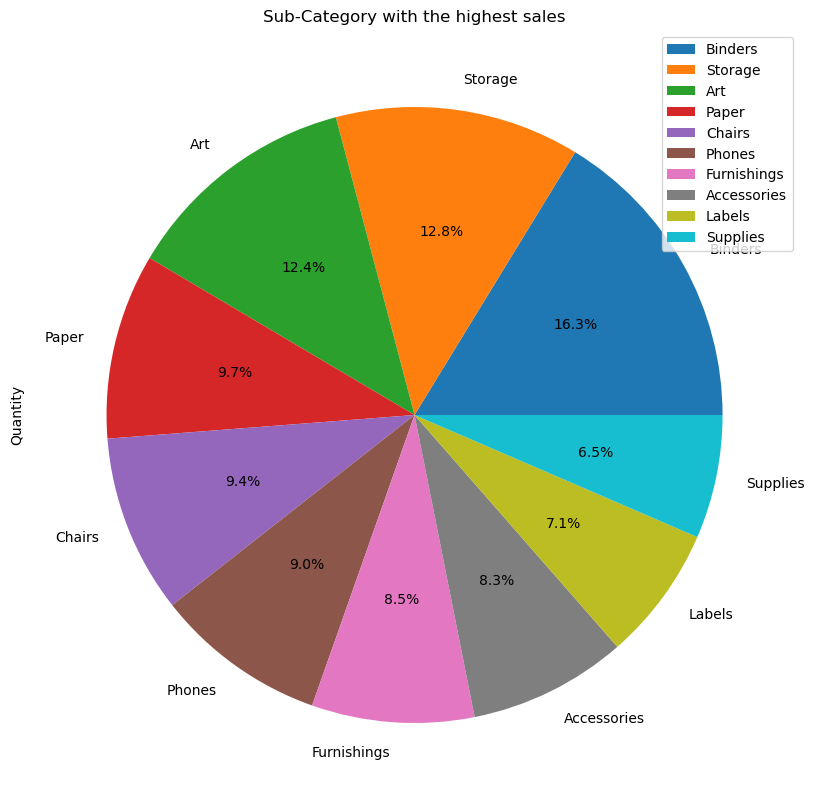

In [30]:
top_10_sub_category.plot.pie(subplots=True, figsize=(14, 10), autopct='%1.1f%%')
plt.title("Sub-Category with the highest sales")
plt.show()

In [31]:
# Highest prioritsed product
df6 = df.groupby(['Product ID']) ['Order Priority'].count().to_frame().sort_values(by = 'Order Priority', ascending = False)

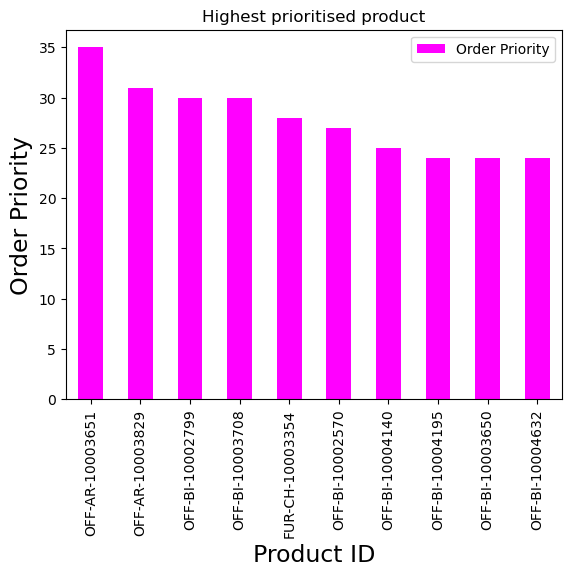

In [32]:
df6.head(10).plot(kind = 'bar', color = 'magenta')
plt.xlabel('Product ID', size = 17)
plt.ylabel('Order Priority', size = 17)
plt.title("Highest prioritised product")
plt.show()

In [33]:
# Month with the highest order
df["Order Month"] = pd.Categorical(df["Order Month"], 
                      categories = months, ordered=True)
df7 = df.groupby(['Order Month']) ['Quantity'].sum().to_frame().sort_values(by='Order Month')
# highest_orders = df7.nlargest(12, 'Quantity')
# highest_orders
df7

,Quantity
Order Month,
January,8843
February,7281
March,10481
April,10552
May,13042
June,18119
July,10984
August,17611
September,20542


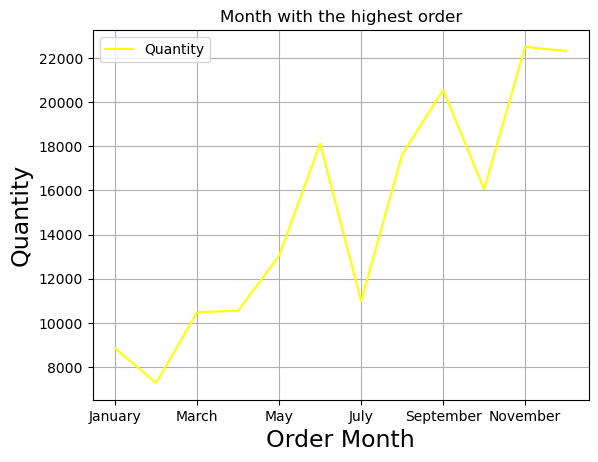

In [34]:
df7.plot(kind = 'line', color = 'yellow', style= '-')
plt.xlabel('Order Month', size = 17)
plt.ylabel('Quantity', size = 17)
plt.title("Month with the highest order")
plt.grid()
plt.show()

In [35]:
# Product with the most profit
df8 = df.groupby(['Product ID']) ['Profit'].sum().to_frame().sort_values(by = 'Profit', ascending = False)
top_10_profit = df8.nlargest(10, 'Profit')
top_10_profit

,Profit
Product ID,
TEC-CO-10004722,25199.9280
OFF-AP-10004512,10345.5840
TEC-PH-10004823,8121.4800
OFF-BI-10003527,7753.0390
TEC-CO-10001449,6983.8836
FUR-CH-10002250,6123.2553
TEC-PH-10004664,5455.9482
OFF-AP-10002330,5452.4640
TEC-PH-10000303,5356.8060


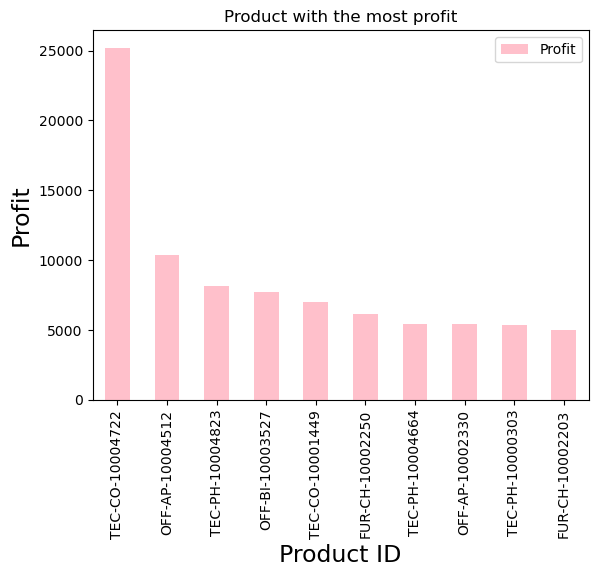

In [36]:
top_10_profit.plot(kind = 'bar', color = 'pink')
plt.xlabel('Product ID', size = 17)
plt.ylabel('Profit', size = 17)
plt.title("Product with the most profit")
plt.show()

In [37]:
df9 = df.groupby(['Order Month']) ['Sales'].mean().to_frame().sort_values(by = 'Sales', ascending = False)
df9

,Sales
Order Month,
October,260.174696
January,259.766707
August,254.791880
March,253.871809
December,250.837952
February,250.802297
November,244.603807
May,241.262967
September,240.565709


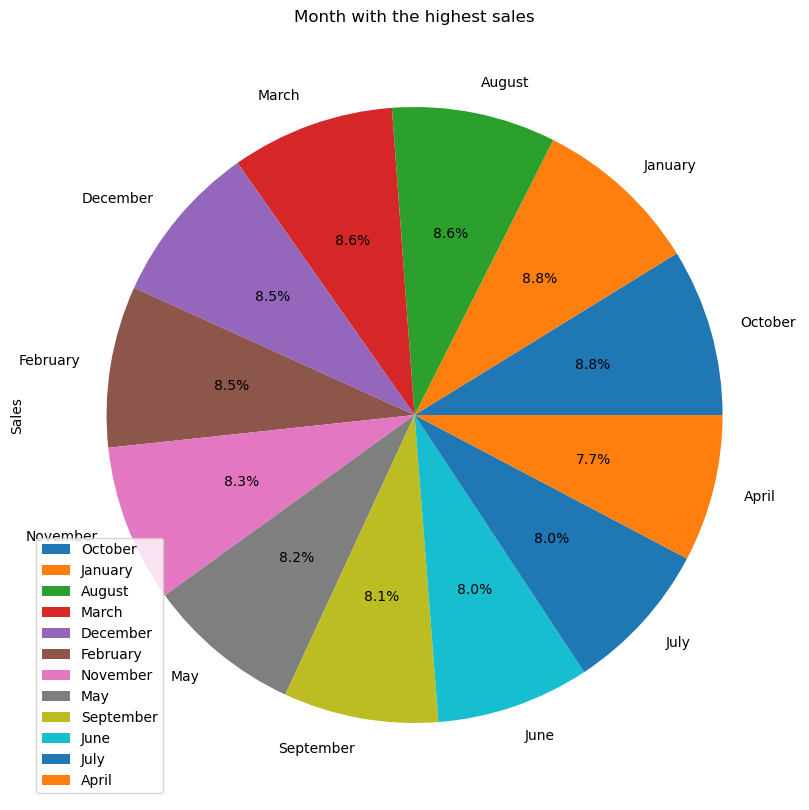

In [38]:
df9.plot.pie(subplots=True, figsize=(14, 10), autopct='%1.1f%%')
plt.title("Month with the highest sales")
plt.show()

In [39]:
#Most valued customer
df10 = df.groupby(['Customer Name']) ['Sales'].mean().to_frame().sort_values(by = 'Sales', ascending = False)
df10

,Sales
Customer Name,
Sean Miller,703.418659
Hunter Lopez,570.633332
Tom Ashbrook,506.100885
Christopher Conant,482.014745
Mike Gockenbach,458.373965
...,...
Allen Armold,118.885218
Catherine Glotzbach,117.577371
Erin Creighton,116.061226


In [40]:
# Product with the highest shipping cost
df10 = df.groupby(['Product Name']) ['Shipping Cost'].sum().to_frame().sort_values(by = 'Shipping Cost', ascending = False)
highest = df10.nlargest(10, 'Shipping Cost')
highest

,Shipping Cost
Product Name,
"Motorola Smart Phone, Full Size",8817.331
"Apple Smart Phone, Full Size",8027.715
"Nokia Smart Phone, Full Size",7852.663
"Cisco Smart Phone, Full Size",7065.166
"Harbour Creations Executive Leather Armchair, Adjustable",6548.165
"Samsung Smart Phone, Cordless",5892.074
"Hon Executive Leather Armchair, Adjustable",5751.541
"Nokia Smart Phone, with Caller ID",5321.110
"Novimex Executive Leather Armchair, Adjustable",5190.842


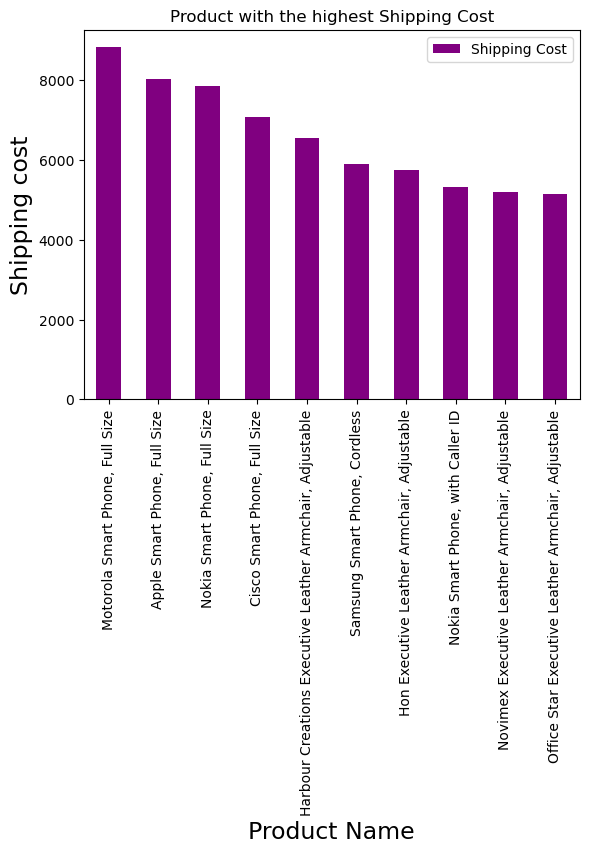

In [41]:
highest.plot(kind = 'bar', color = 'purple')
plt.xlabel('Product Name', size = 17)
plt.ylabel('Shipping cost', size = 17)
plt.title("Product with the highest Shipping Cost")
plt.show()

In [42]:
df11 = df[['Shipping Cost', 'Sales', 'Quantity', 'Discount', 'Profit', 'Days taken']]
df11.head()

,Shipping Cost,Sales,Quantity,Discount,Profit,Days taken
0,933.57,2309.650,7,0.0,762.1845,0
1,923.63,3709.395,9,0.1,-288.7650,2
2,915.49,5175.171,9,0.1,919.9710,1
3,910.16,2892.510,5,0.1,-96.5400,2
4,903.04,2832.960,8,0.0,311.5200,1


In [43]:
cor = df11.corr()
cor

,Shipping Cost,Sales,Quantity,Discount,Profit,Days taken
Shipping Cost,1.000000,0.768073,0.272649,-0.079055,0.354441,-0.047052
Sales,0.768073,1.000000,0.313577,-0.086722,0.484918,-0.003899
Quantity,0.272649,0.313577,1.000000,-0.019875,0.104365,0.008303
Discount,-0.079055,-0.086722,-0.019875,1.000000,-0.316490,-0.012080
Profit,0.354441,0.484918,0.104365,-0.316490,1.000000,-0.003630
Days taken,-0.047052,-0.003899,0.008303,-0.012080,-0.003630,1.000000


<Axes: >

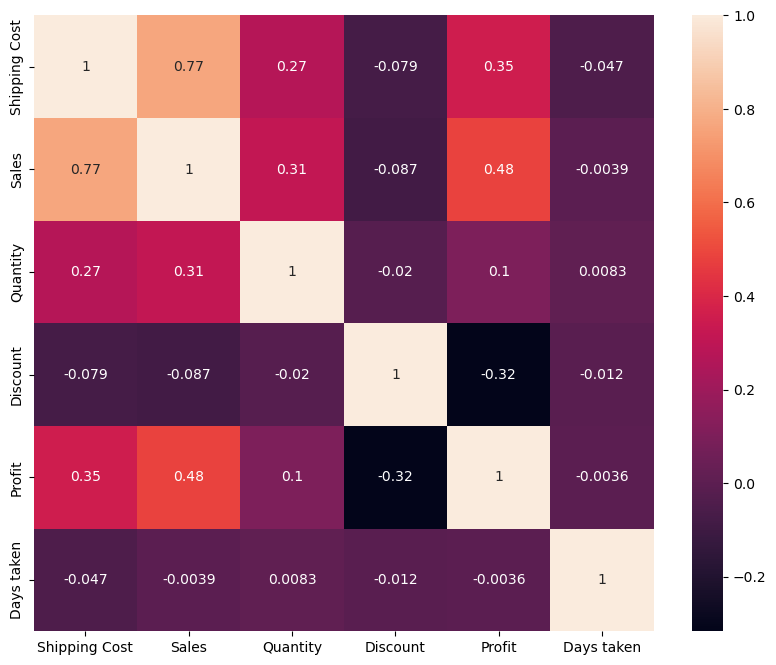

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(data = cor, annot = True, cmap = 'rocket')

In [46]:
df.to_excel('Sales dataset.xlsx')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Order Priority,Selling price for one,Cost price,Day of order,Day of shipping,Order Month,Order Year,Ship Month,Ship Year,Days taken
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Critical,329.857143,1547.4655,31,31,July,2012,July,2012,0
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Critical,412.111111,3998.1600,05,07,February,2013,February,2013,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Medium,575.000000,4255.2000,17,18,October,2013,October,2013,1
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Medium,578.400000,2989.0500,28,30,January,2013,January,2013,2
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Critical,354.000000,2521.4400,05,06,November,2013,November,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Medium,13.000000,60.6000,19,19,June,2014,June,2014,0
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Medium,0.000000,1.5540,20,24,June,2014,June,2014,4
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,High,7.333333,11.6892,02,02,December,2013,December,2013,0
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Medium,6.500000,11.0400,18,22,February,2012,February,2012,4


In [ ]:
import ydata_profiling as yp